## Анализ и прогнозирование временных рядов методами искусственного интеллекта

### **Практическая работа 3. Поиск аномалий во временных рядах.**


#### **3.1 Поиск диссонансов с помощью алгоритма HotSAX**

##### 3.1.1 Загрузка и подготовка данных

В данной будет использоваться временной ряд, состоящий из показаний акселерометра. 
Анализируемый временной ряд, описывает две активности человека - бег и шаг.


In [1]:
!pip install scipy
!pip install scikit-learn


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\Home\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\Home\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from time import time
import pandas as pd
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive/2025-Kovalev-TimeSeriesCourse/practice/03 Discords')

In [3]:
#data_path = '/content/drive/MyDrive/2025-Kovalev-TimeSeriesCourse/practice/03 Discords/dataset/walk_run.txt'
data_path = './dataset/walk_run.txt'
walk_run = np.loadtxt(data_path)[3000:4000]
data = walk_run
size_sub = 50

В середине временного ряда происходит смена активности (бег заменяет шаг). Нетипичным поведением, которое мы могли бы назвать диссонансами в данном ряде выступает небольшой участок между активностями, когда человек плавно увеличивает скорость шага до бега. В ходе данной работе наша задача выделить с помощью различных алгоритмов границы нашего диссонанса.

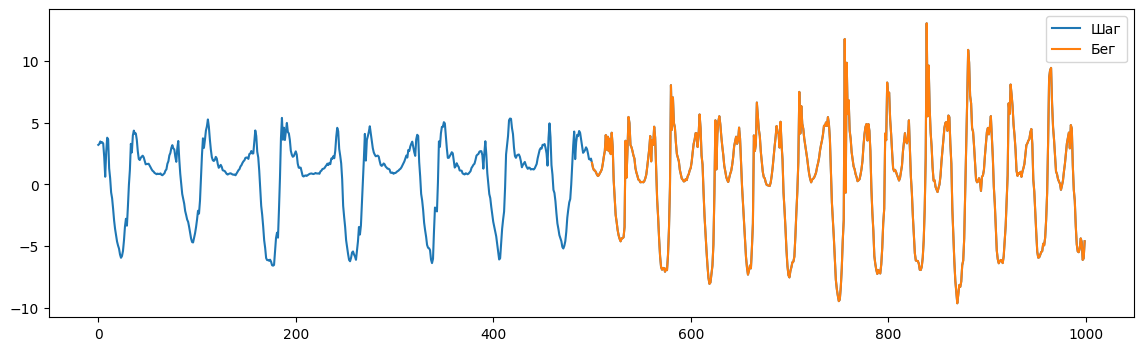

In [4]:
fig, ax =  plt.subplots(figsize=(14,4),ncols=1,nrows=1)
plt.plot(data[:],label='Шаг')
plt.plot(np.arange(data.shape[0]//2,data.shape[0]),data[data.shape[0]//2:],label='Бег')
plt.legend()

In [5]:
result={}
times={}

##### 3.1.2 Реализация полного перебора

Приводится пример кода для нахождения топ 5 диссонансов с помощью реализации полного беребора.
Вам необходимо добавить код для сбора времени обработки данных.

In [6]:
from modules.saxpy.discord import find_discords_brute_force
start = time()
discords_brute_force= np.stack(find_discords_brute_force(data[:], 50, 5))
end = time()

In [7]:
times_brute_force = end - start
times['brute_force'] = times_brute_force
result['brute_force'] = discords_brute_force

In [8]:
print("brute_force - Полный перебор")
print(f"lead time = {times_brute_force}")
print(f"Results {discords_brute_force}")

brute_force - Полный перебор
lead time = 57.253793716430664
Results [[477.           5.88100934]
 [412.           5.32704317]
 [195.           3.39426635]
 [577.           3.35554403]
 [278.           3.10959389]]


##### 3.1.3 HotSAX

Используя [реализацию](https://github.com/seninp/saxpy/blob/master/saxpy/hotsax.py) найдите топ 5 диссонансов ряда.
Произведите замер времени работы.

In [9]:
from modules.saxpy.hotsax import find_discords_hotsax
start = time()
discords_hotsax = np.stack(find_discords_hotsax(data[:], 50, 5))
end = time()

In [10]:
times_hotsax = end - start
times['hotsax'] = times_hotsax
result['hotsax'] = discords_hotsax

In [11]:
print("HotSAX")
print(f"lead time = {times_hotsax}")
print(f"Results {discords_hotsax}")

HotSAX
lead time = 1.3334057331085205
Results [[477.           5.88100934]
 [412.           5.32704317]
 [195.           3.39426635]
 [577.           3.35554403]
 [278.           3.10959389]]


##### 3.1.4 Визаулизация

Вам необходимо реализовать код позволяющий:
1. Вывести на одном графике ряд и его диссонансы
2. Столбчатую диаграмму времени работы обоих алгоритмов
   
Постройте графики для обоих алгоритмов и сравните полученные результаты.

Пример графика:

![first_graf](pics/fig_ex_1.png)

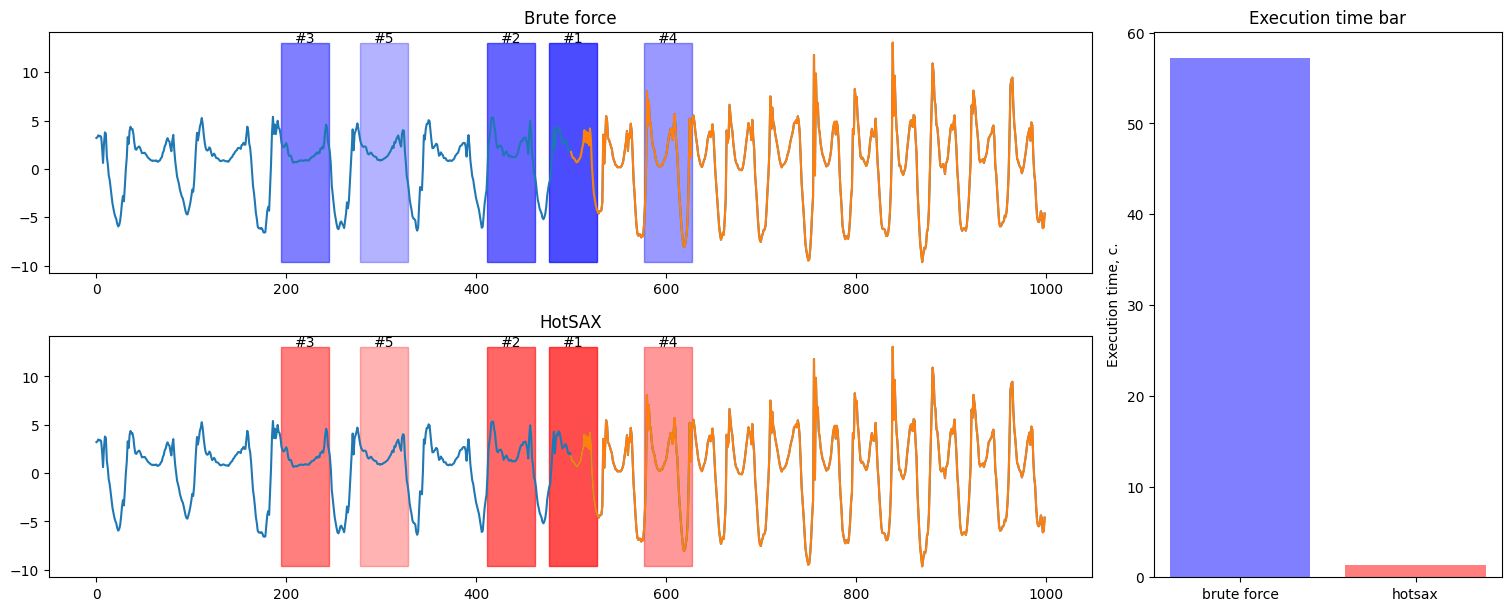

In [12]:
gs_kw = dict(width_ratios=[3, 1], height_ratios=[1, 1])

fig, axd = plt.subplot_mosaic([['left', 'bottom'],['right', 'bottom']],
                              gridspec_kw=gs_kw, figsize=(15, 6),
                              layout="constrained")

mn, mx = min(data), max(data)

for i in range(len(discords_brute_force)):
    alpha = 1-(i+3)*0.1
    axd['left'].add_patch(Rectangle(xy=(discords_brute_force[i][0], mn), width=size_sub, height=mx-mn, color='blue', alpha=alpha))
    axd['left'].text(discords_brute_force[i][0]+size_sub/2, mx, f"#{i+1}", ha='center')
axd['left'].plot(data[:], label='Walk')
axd['left'].plot(np.arange(data.shape[0]//2, data.shape[0]), data[data.shape[0]//2:], label='Run')

for i in range(len(discords_hotsax)):
    alpha = 1-(i+3)*0.1
    axd['right'].add_patch(Rectangle(xy=(discords_hotsax[i][0], mn), width=size_sub, height=mx-mn, color='red', alpha=alpha))
    axd['right'].text(discords_hotsax[i][0]+size_sub/2, mx, f"#{i+1}", ha='center')
axd['right'].plot(data[:], label='Walk')
axd['right'].plot(np.arange(data.shape[0]//2, data.shape[0]), data[data.shape[0]//2:], label='Run')

axd['bottom'].bar(['brute force', 'hotsax'], [times_brute_force, times_hotsax], color=['blue', 'red'], alpha=0.5)
axd['bottom'].set_ylabel('Execution time, с.');


axd['left'].set(title='Brute force')
axd['right'].set(title='HotSAX')
axd['bottom'].set(title='Execution time bar')
axd['left'].plot()
axd['bottom'].plot()
axd['right'].plot()
plt.show()

##### 3.1.5 Такси NY

Произведите поиск диссонансов с помощью обоих алгоритмов на наборе данных, содержащим информацию о среднем числе пассажиров в NY. Отобразите найденные диссонансы обоими алгоритмами. 

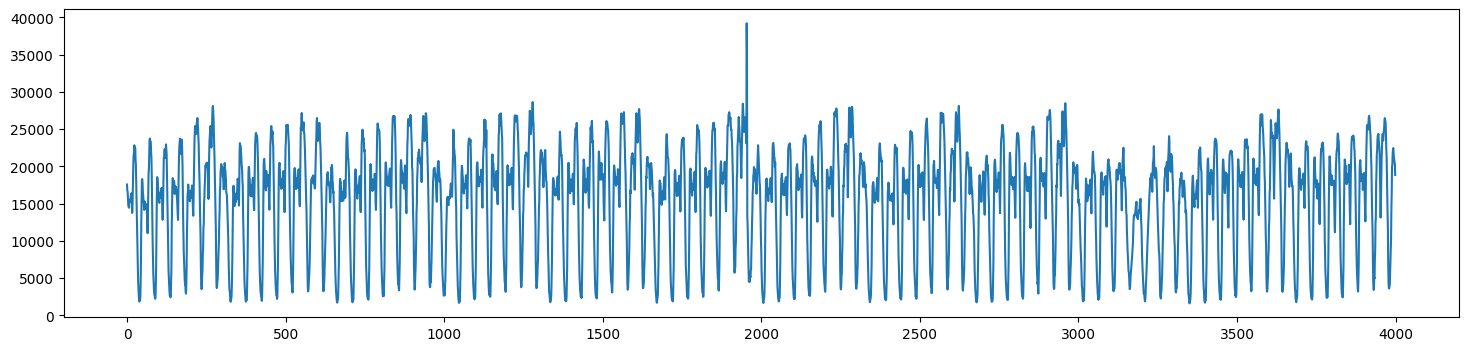

In [15]:
nyc_taxi = pd.read_csv('./dataset/nyc_taxi.csv',index_col=0).values[4000:8000,0].astype(np.float64)
fig = plt.figure(figsize=(18, 4))
plt.plot(nyc_taxi)

Brute force

In [16]:
from modules.saxpy.hotsax import find_discords_hotsax
start = time()
discords_brute_force_nyc_taxi = np.stack(find_discords_brute_force(nyc_taxi[:], 50, 5))
end = time()

In [17]:
times_brute_force_nyc_taxi = end - start

In [18]:
print("brute_force - Полный перебор")
print(f"lead time = {times_brute_force_nyc_taxi}")
print(f"Results {discords_brute_force_nyc_taxi}")

brute_force - Полный перебор
lead time = 1289.0327534675598
Results [[1.91000000e+03 3.52681530e+00]
 [3.12000000e+03 3.40233164e+00]
 [3.18300000e+03 2.64204097e+00]
 [3.23700000e+03 2.22922775e+00]
 [9.63000000e+02 1.61152765e+00]]


HotSAX

In [19]:
start = time()
discords_hotsax_nyc_taxi = np.stack(find_discords_hotsax(data[:], 50, 5))
end = time()

In [20]:
times_hotsax_nyc_taxi = end - start

In [21]:
print("HotSAX")
print(f"lead time = {times_hotsax_nyc_taxi}")
print(f"Results {discords_hotsax_nyc_taxi}")

HotSAX
lead time = 1.3479185104370117
Results [[477.           5.88100934]
 [412.           5.32704317]
 [195.           3.39426635]
 [577.           3.35554403]
 [278.           3.10959389]]


Визуализация

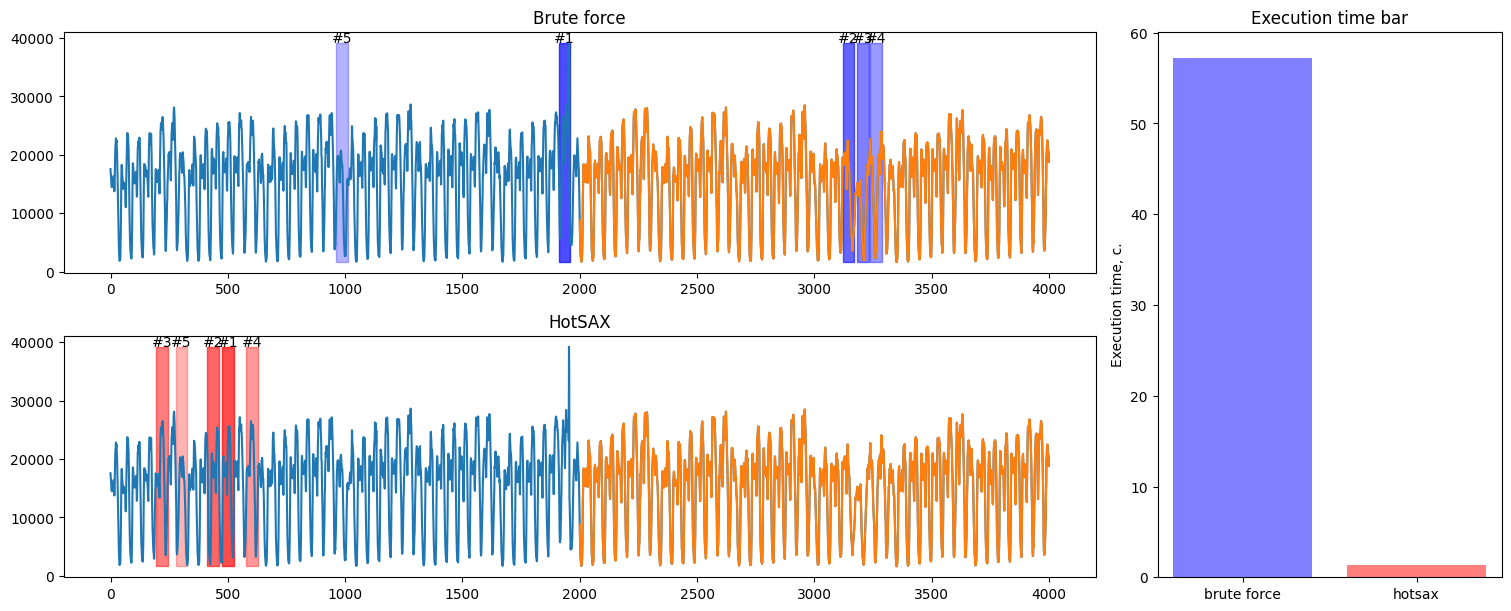

In [22]:
gs_kw = dict(width_ratios=[3, 1], height_ratios=[1, 1])

fig, axd = plt.subplot_mosaic([['left', 'bottom'],['right', 'bottom']],
                              gridspec_kw=gs_kw, figsize=(15, 6),
                              layout="constrained")
data = nyc_taxi

mn, mx = min(data), max(data)

for i in range(len(discords_brute_force_nyc_taxi)):
    alpha = 1-(i+3)*0.1
    axd['left'].add_patch(Rectangle(xy=(discords_brute_force_nyc_taxi[i][0], mn), width=size_sub, height=mx-mn, color='blue', alpha=alpha))
    axd['left'].text(discords_brute_force_nyc_taxi[i][0]+size_sub/2, mx, f"#{i+1}", ha='center')
axd['left'].plot(data[:], label='Walk')
axd['left'].plot(np.arange(data.shape[0]//2, data.shape[0]), data[data.shape[0]//2:], label='Run')

for i in range(len(discords_hotsax_nyc_taxi)):
    alpha = 1-(i+3)*0.1
    axd['right'].add_patch(Rectangle(xy=(discords_hotsax_nyc_taxi[i][0], mn), width=size_sub, height=mx-mn, color='red', alpha=alpha))
    axd['right'].text(discords_hotsax_nyc_taxi[i][0]+size_sub/2, mx, f"#{i+1}", ha='center')
axd['right'].plot(data[:], label='Walk')
axd['right'].plot(np.arange(data.shape[0]//2, data.shape[0]), data[data.shape[0]//2:], label='Run')

axd['bottom'].bar(['brute force', 'hotsax'], [times_brute_force, times_hotsax], color=['blue', 'red'], alpha=0.5)
axd['bottom'].set_ylabel('Execution time, с.');


axd['left'].set(title='Brute force')
axd['right'].set(title='HotSAX')
axd['bottom'].set(title='Execution time bar')
axd['left'].plot()
axd['bottom'].plot()
axd['right'].plot()
plt.show()